**Importing libraries to read, analyze and plot data**
1. **Numpy**
2. **Pandas**
3. **Matplotlib**
4. **Seaborn**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Reading** **dataset**- The suicide dataset is taken froom kaggle. It contains yearly information, state wise and reasons of suicides. It also contains age group and gender of people committing suicides. Link- https://www.kaggle.com/rajanand/suicides-in-india

In [2]:
df = pd.read_csv("/content/drive/MyDrive/projects/SuicidesIndia.csv")
df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


**Exploring** **the** **dataset**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237519 entries, 0 to 237518
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   State      237519 non-null  object
 1   Year       237519 non-null  int64 
 2   Type_code  237519 non-null  object
 3   Type       237519 non-null  object
 4   Gender     237519 non-null  object
 5   Age_group  237519 non-null  object
 6   Total      237519 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 12.7+ MB


In [4]:
df.shape

(237519, 7)

In [5]:
df.duplicated().any()

False

In [6]:
df.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [7]:
df.nunique()

State          38
Year           12
Type_code       5
Type           69
Gender          2
Age_group       6
Total        2180
dtype: int64

**Analyzing the number of suicides in every year from 2001- 2012**

In [8]:
dyear = df.groupby("Year")["Total"].sum()
dyear

Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64

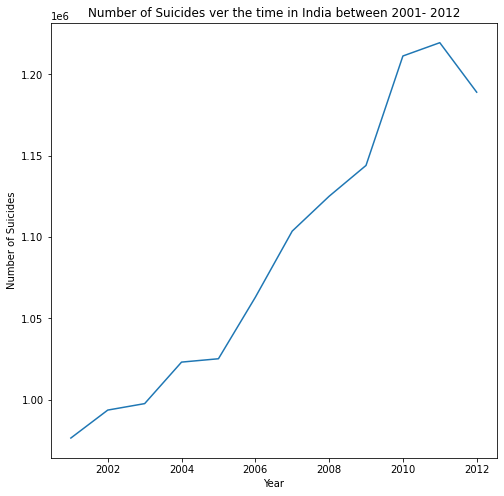

In [9]:
plt.figure(figsize=(8,8))
plt.title("Number of Suicides ver the time in India between 2001- 2012")
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
df.groupby("Year")["Total"].sum().plot(kind="line")

**Analyzing the gender of the people committing suicide-**
The result shows that number of males are almost twice of number of females who commited suicide from 2001- 2012 

In [10]:
dgender = df.groupby("Gender")["Total"].sum()
dgender

Gender
Female    4702974
Male      8368760
Name: Total, dtype: int64

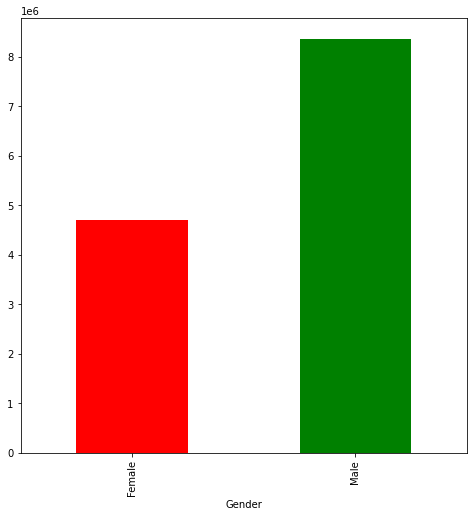

In [11]:
plt.figure(figsize=(8,8))
df.groupby("Gender")["Total"].sum().plot(kind="bar",color=['r','g'])

**Analyzing the number of people from every State and Union Territory who committed suicide**

In [12]:
df = df[(df['State']!="Total (States)")&(df["State"]!="Total (Uts)")&(df['State']!="Total (All India)")]
df['State'].value_counts()

Karnataka            6792
Madhya Pradesh       6792
Maharashtra          6792
Andhra Pradesh       6791
Odisha               6791
Rajasthan            6791
Chhattisgarh         6790
Haryana              6790
Bihar                6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Gujarat              6786
Tamil Nadu           6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Name: State, dtype: int64

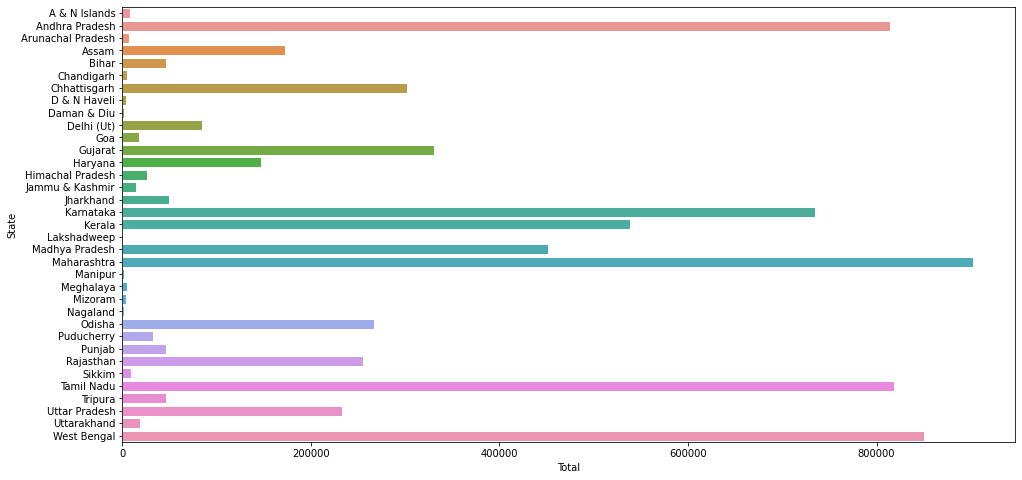

In [13]:
filters = pd.DataFrame(df.groupby(["State"])["Total"].sum()).reset_index()
plt.figure(figsize=(16,8))
sns.barplot(x='Total',y='State',data=filters,edgecolor='w')
plt.show()

**Analyzing the number of people committing suicides from States and Union Territories using Wordcloud**

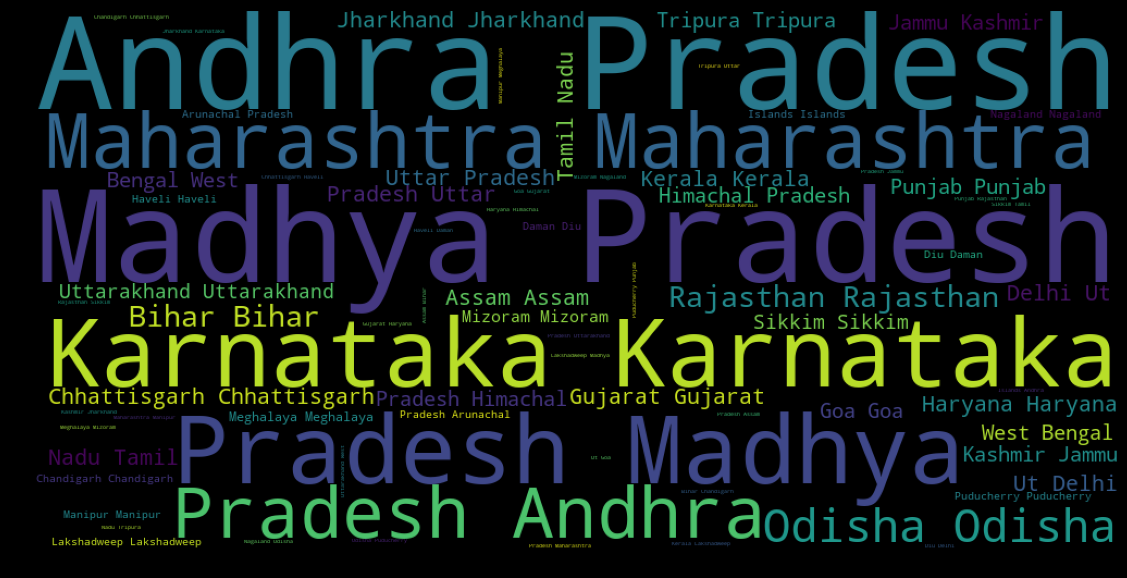

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="black",width=1000,height=500).generate(' '.join(df['State'].tolist()))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)

**Analyzing the types of reasons of suicides**

In [15]:
vc = df['Type_code'].value_counts()
vc

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          6720
Social_Status             4200
Name: Type_code, dtype: int64

<BarContainer object of 5 artists>

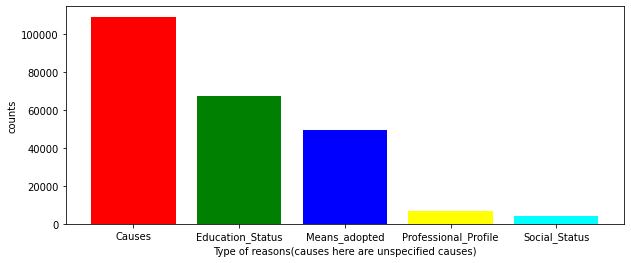

In [16]:
plt.figure(figsize=(10,4))
plt.xlabel("Type of reasons(causes here are unspecified causes)")
plt.ylabel("counts")
plt.bar(df['Type_code'].unique(),vc,color=['red','green','blue','yellow','cyan'])

**Analyzing the exact reason behind suicides using Wordcloud**

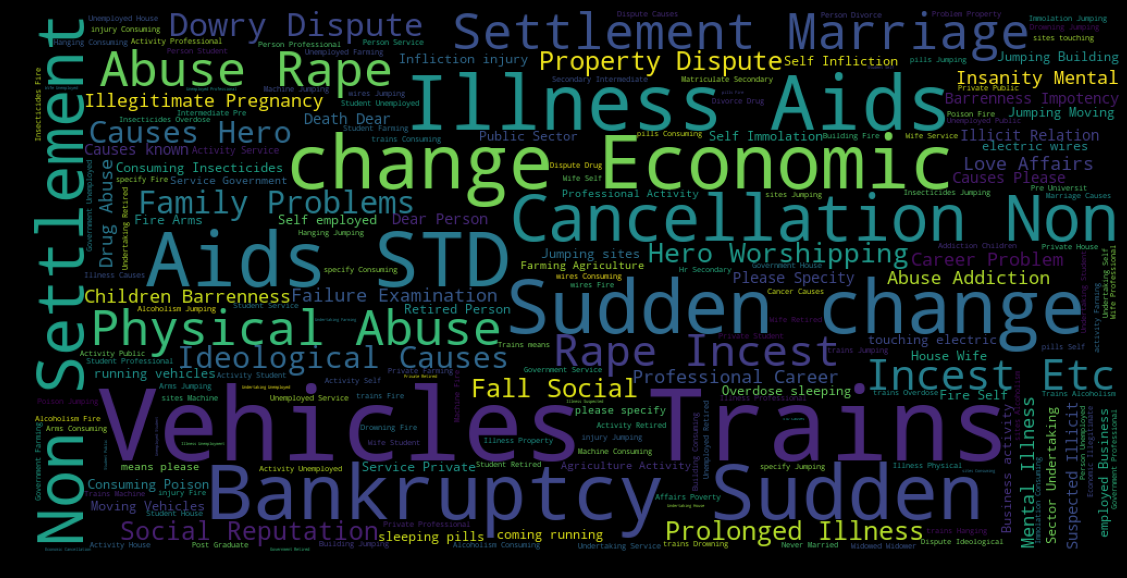

In [17]:
df = df[(df['Type'] != "Others (Please Specify)")]
wordcloud = WordCloud(background_color="black",width=1000,height=500).generate(' '.join(df['Type'].tolist()))
plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wordcloud)

**Analyzing the age groups of people who committed suicide-**
The result shows that people from all the ages are equally likely to commit suicide due to various reasons

In [18]:
df = df[df["Age_group"]!="0-100+"]
agvc = df['Age_group'].value_counts()
agvc

30-44    43680
0-14     43680
45-59    43680
60+      43680
15-29    43680
Name: Age_group, dtype: int64

<BarContainer object of 5 artists>

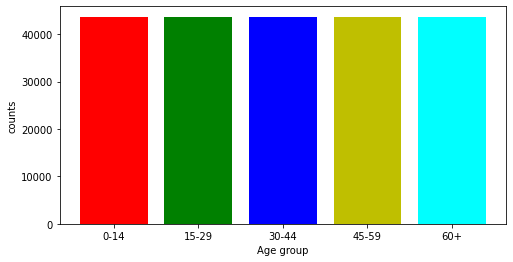

In [19]:
plt.figure(figsize=(8,4))
plt.xlabel("Age group")
plt.ylabel("counts")
plt.bar(df['Age_group'].unique(),agvc,color=['r','g','b','y','cyan'])

**Analyzing the professional profile and genders of people who committed suicide**

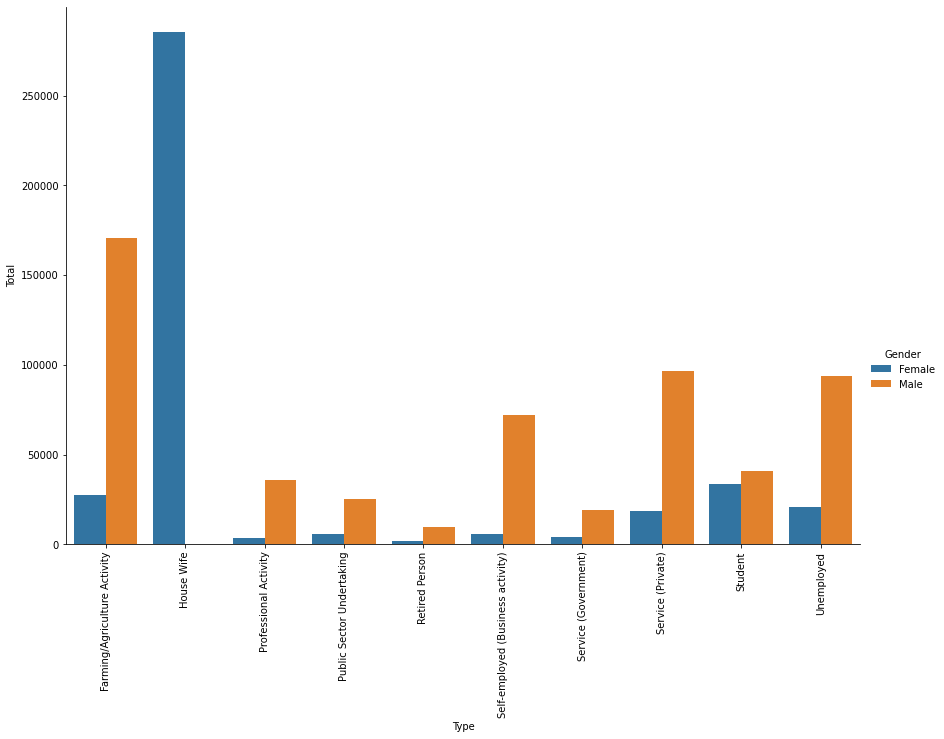

In [20]:
filter_ss = pd.DataFrame(df[df['Type_code']=="Professional_Profile"].groupby(['Type','Gender'])['Total'].sum()).reset_index()
s = sns.catplot(x="Type",y="Total",hue="Gender",kind="bar",data=filter_ss,height=8,aspect=1.5);
s.set_xticklabels(rotation=90)

**Summary of males who committed suicide in** **India**

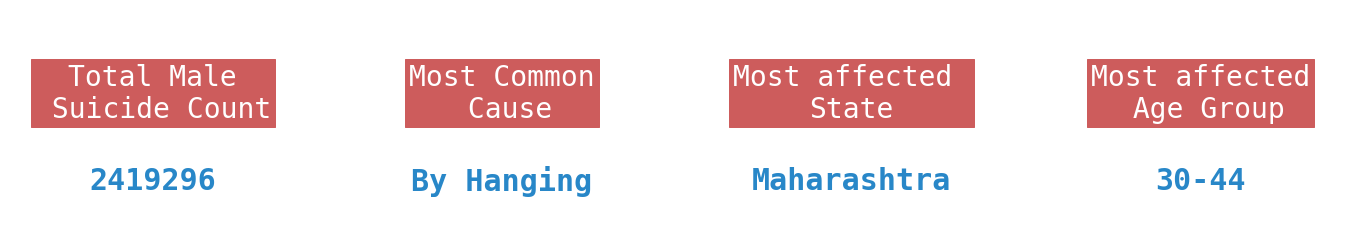

In [21]:
col = ['Total Male\n Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','30-44']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='white', backgroundcolor='indianred')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='#2887C8', backgroundcolor='white')
    
    axes[ind].set_axis_off()

**Summary of females who committed suicide in India**

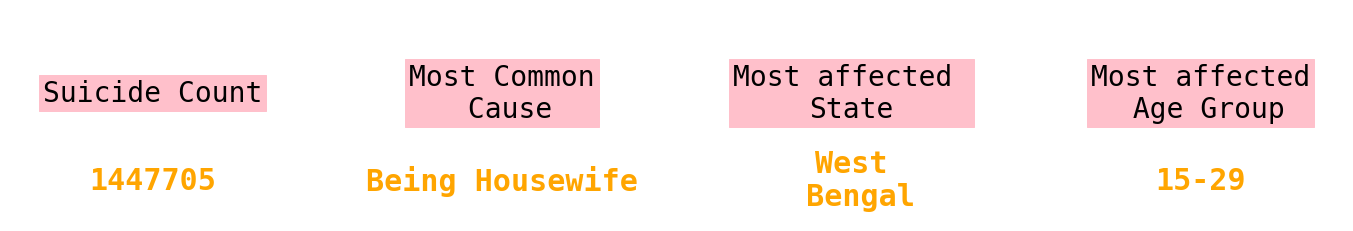

In [22]:
col = ['Suicide Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df.groupby('Gender').sum()['Total']['Female'],'Being Housewife','West\n Bengal','15-29']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=28,
            color='black', backgroundcolor='pink')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=30, fontweight='bold',
            color='Orange', backgroundcolor='white')
    
    axes[ind].set_axis_off()

**Summary of people who committed suicide in India**

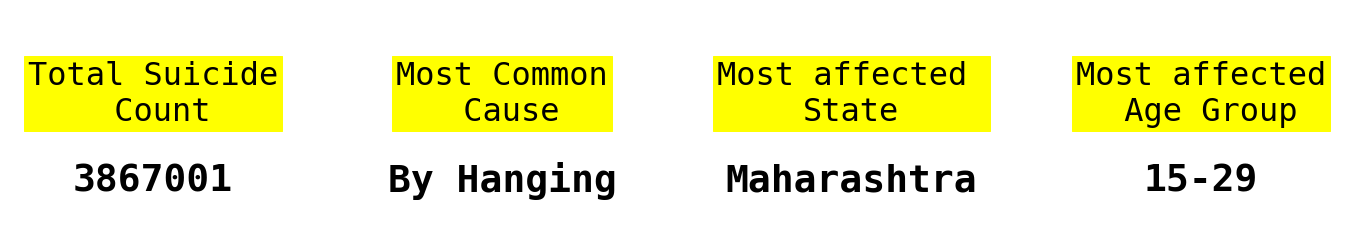

In [23]:
col = ['Total Suicide\n Count', 'Most Common\n Cause', 'Most affected \nState', 'Most affected\n Age Group',]

values = [df.groupby('Gender').sum()['Total']['Female'] + df.groupby('Gender').sum()['Total']['Male'],'By Hanging','Maharashtra','15-29']
color_val = ['lightblue','lightblue','lightblue','lightblue']

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
axes = axes.flatten()
fig.set_facecolor('white')

for ind, col in enumerate(col):
    axes[ind].text(0.5, 0.6, col, 
            ha='center', va='center',
            fontfamily='monospace', fontsize=32,
            color='black', backgroundcolor='yellow')

    axes[ind].text(0.5, 0.2, values[ind], 
            ha='center', va='center',
            fontfamily='monospace', fontsize=38, fontweight='bold',
            color='black', backgroundcolor='white')
    
    axes[ind].set_axis_off()